# Aim
This is a small yet useful kernel for providing an introduction to **Artificial Neural Networks** for people who want to begin their journey into the field of **deep learning**. For this, I have used Keras which is a high-level Neural Networks API built on top of low level neural networks APIs like Tensorflow and Theano. As it is high-level, many things are already taken care of therefore it is easy to work with and a great tool to start with. [Here's the documentation for keras](https://keras.io/)

# What is Deep learning?
Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example. Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost. It is the key to voice control in consumer devices like phones, tablets, TVs, and hands-free speakers. Deep learning is getting lots of attention lately and for good reason. It’s achieving results that were not possible before.


# What are artificial neural networks?
An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output. ANNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. ANN is also known as a neural network.


<img src="https://cdn-images-1.medium.com/max/1000/1*ZX05x1xYgaVoa4Vn2kKS9g.png">

A single neuron is known as a perceptron. It consists of a layer of inputs(corresponds to columns of a dataframe). Each input has a weight which controls the magnitude of an input.
The summation of the products of these input values and weights is fed to the activation function. Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable. 

They introduce non-linear properties to our Network.Their main purpose is to convert a input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.  Specifically in A-NN we do the sum of products of inputs(X) and their corresponding Weights(W) and apply a Activation function f(x) to it to get the output of that layer and feed it as an input to the next layer. [Refer to this article for more info.](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f)
<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Single-Perceptron.png">
**Concept of backpropagation** - Backpropagation, short for "backward propagation of errors," is an algorithm for supervised learning of artificial neural networks using gradient descent. Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights. It is a generalization of the delta rule for perceptrons to multilayer feedforward neural networks.
<img src="https://www.researchgate.net/profile/Hassan_Al-Haj_Ibrahim/publication/235338024/figure/fig6/AS:299794191929349@1448487913220/Flow-chart-for-the-back-propagation-BP-learning-algorithm.png">
**Gradient Descent** - To explain Gradient Descent I’ll use the classic mountaineering example. Suppose you are at the top of a mountain, and you have to reach a lake which is at the lowest point of the mountain (a.k.a valley). A twist is that you are blindfolded and you have zero visibility to see where you are headed. So, what approach will you take to reach the lake? The best way is to check the ground near you and observe where the land tends to descend. This will give an idea in what direction you should take your first step. If you follow the descending path, it is very likely you would reach the lake. [Refer to this article for more information.](https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/)

About Breast Cancer Wisconsin (Diagnostic) Data Set
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('D:/AI/实验2/1、数据/data.csv')
del data['Unnamed: 32']                      #######删掉噪声

In [18]:
X = data.iloc[:, 2:].values                 #######拆分特征和标签
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()              ##########将字母标签转为数字形式
y = labelencoder_X_1.fit_transform(y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)       #fit_transform()的作用就是先拟合数据，然后转化它将其转化为标准形式。
X_test = sc.transform(X_test)             #已经找到了转换规则，我们把这个规则利用在训练集上，同样，我们可以直接将其运用到测试集上

**Now that we have prepared data, we will import Keras and its packages.**

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [20]:
# Initialising the ANN
classifier = Sequential()                        #建立顺序模型

In [21]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))        #output_dim表示该层神经元是16个，'uniform'表示用均匀分布去初始化，activation代表激活函数，input_dim代表输入层特征个数
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))                    #在隐藏层中删掉一些神经元，增加随机性，避免过拟合

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


input_dim - number of columns of the dataset 

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN
 
The **ReLU** function is f(x)=max(0,x). Usually this is applied element-wise to the output of some other function, such as a matrix-vector product. In MLP usages, rectifier units replace all other activation functions except perhaps the readout layer. But I suppose you could mix-and-match them if you'd like. One way ReLUs improve neural networks is by speeding up training. The gradient computation is very simple (either 0 or 1 depending on the sign of x). Also, the computational step of a ReLU is easy: any negative elements are set to 0.0 -- no exponentials, no multiplication or division operations. Gradients of logistic and hyperbolic tangent networks are smaller than the positive portion of the ReLU. This means that the positive portion is updated more rapidly as training progresses. However, this comes at a cost. The 0 gradient on the left-hand side is has its own problem, called "dead neurons," in which a gradient update sets the incoming values to a ReLU such that the output is always zero; modified ReLU units such as ELU (or Leaky ReLU etc.) can minimize this. Source : [StackExchange](https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it)

In [22]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [23]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


output_dim is 1 as we want only 1 output from the final layer.

Sigmoid function is used when dealing with classfication problems with 2 types of results.(Submax function is used for 3 or more classification results)
<img src="https://cdn-images-1.medium.com/max/1000/1*Xu7B5y9gp0iL5ooBj7LtWw.png">

In [24]:
# Compiling the ANN
from keras.optimizers import Adam
adam = Adam(lr=0.01)
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

Optimizer is chosen as adam for gradient descent.

Binary_crossentropy is the loss function used. 

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. [More about this](http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

In [25]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

Epoch 1/150
512/512 [==============================] - 0s 475us/step - loss: 0.6813 - acc: 0.7090
Epoch 2/150
512/512 [==============================] - 0s 10us/step - loss: 0.5340 - acc: 0.9453
Epoch 3/150
512/512 [==============================] - 0s 10us/step - loss: 0.2407 - acc: 0.9492
Epoch 4/150
512/512 [==============================] - 0s 12us/step - loss: 0.1175 - acc: 0.9590
Epoch 5/150
512/512 [==============================] - 0s 12us/step - loss: 0.0872 - acc: 0.9766
Epoch 6/150
512/512 [==============================] - 0s 10us/step - loss: 0.0760 - acc: 0.9746
Epoch 7/150
512/512 [==============================] - 0s 12us/step - loss: 0.0731 - acc: 0.9746
Epoch 8/150
512/512 [==============================] - 0s 14us/step - loss: 0.0659 - acc: 0.9824
Epoch 9/150
512/512 [==============================] - 0s 14us/step - loss: 0.0636 - acc: 0.9844
Epoch 10/150
512/512 [==============================] - 0s 14us/step - loss: 0.0576 - acc: 0.9863
Epoch 11/150
512/512 [======

512/512 [==============================] - 0s 12us/step - loss: 0.0123 - acc: 0.9961
Epoch 85/150
512/512 [==============================] - 0s 12us/step - loss: 0.0175 - acc: 0.9922
Epoch 86/150
512/512 [==============================] - 0s 12us/step - loss: 0.0143 - acc: 0.9941
Epoch 87/150
512/512 [==============================] - 0s 12us/step - loss: 0.0236 - acc: 0.9883
Epoch 88/150
512/512 [==============================] - 0s 10us/step - loss: 0.0105 - acc: 0.9961
Epoch 89/150
512/512 [==============================] - 0s 12us/step - loss: 0.0115 - acc: 0.9961
Epoch 90/150
512/512 [==============================] - 0s 14us/step - loss: 0.0188 - acc: 0.9961
Epoch 91/150
512/512 [==============================] - 0s 10us/step - loss: 0.0102 - acc: 0.9980
Epoch 92/150
512/512 [==============================] - 0s 10us/step - loss: 0.0143 - acc: 0.9941
Epoch 93/150
512/512 [==============================] - 0s 12us/step - loss: 0.0117 - acc: 0.9941
Epoch 94/150
512/512 [===========

Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 98.24561403508771%


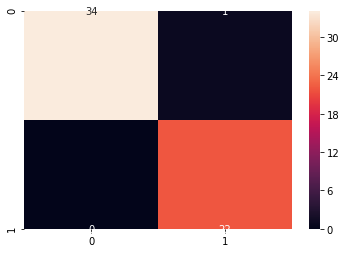

In [29]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

Thanks for reading this. May this help you on your "deep" journey into machine learning.